<a href="https://colab.research.google.com/github/lutpio/Posttest-2-Datmin/blob/main/A1_2109116009_POSTTEST2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [120]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from itertools import permutations

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [121]:
df = pd.read_excel("dataset_market_basket.xlsx",sheet_name="Sheet1")

In [122]:
df

,whole milk,pastry,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegatables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Menghitung berapa banyak 1 item dibeli

In [123]:
df.sum()

whole milk             5
pastry                 1
salty snack            1
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegatables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             3
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

##Mencari dan menampilkan berapa banyak item dengan yang memiliki kombinasi dengan item lain

In [124]:
rules = list(permutations(df.columns, 2))
rule_baru = []
for rule in rules:
  # Memfilter dengan nama kolom
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)# mencari kombinasi item yang tidak 0 / kosong 



hitung = {} #Ganti dictionary
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data
# dict hitung, berisi kombinasi yang muncul dan jumlah munculnya kombinasi tersebut 
hitung

{"('whole milk', 'pastry')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pastry', 'whole milk')": 1,
 "('pastry', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pastry')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegatables')": 1,
 "('soda', 'frankfurter')": 1,
 "('soda', 'whipped/sour cream')": 1,
 "('pickled vegatables', 'soda')": 1,
 "('can

##Menampilkan nilai Support kedua item

In [125]:
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(df)*100}%")

('whole milk', 'pastry') support = 5.263157894736842%
('whole milk', 'salty snack') support = 5.263157894736842%
('whole milk', 'sausage') support = 10.526315789473683%
('whole milk', 'semi-finished bread') support = 5.263157894736842%
('whole milk', 'yogurt') support = 5.263157894736842%
('whole milk', 'soda') support = 5.263157894736842%
('whole milk', 'rolls/buns') support = 5.263157894736842%
('whole milk', 'butter') support = 5.263157894736842%
('pastry', 'whole milk') support = 5.263157894736842%
('pastry', 'salty snack') support = 5.263157894736842%
('salty snack', 'whole milk') support = 5.263157894736842%
('salty snack', 'pastry') support = 5.263157894736842%
('sausage', 'whole milk') support = 10.526315789473683%
('sausage', 'semi-finished bread') support = 5.263157894736842%
('sausage', 'yogurt') support = 5.263157894736842%
('sausage', 'hygiene articles') support = 5.263157894736842%
('sausage', 'rolls/buns') support = 10.526315789473683%
('semi-finished bread', 'whole milk

##Menampilkan nilai Confidence dari kombinasi kemungkinan item

In [126]:
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%")

whole milk->pastry  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sausage  Confidence = 40.0%
whole milk->semi-finished bread  Confidence = 20.0%
whole milk->yogurt  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pastry->whole milk  Confidence = 100.0%
pastry->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 100.0%
salty snack->pastry  Confidence = 100.0%
sausage->whole milk  Confidence = 50.0%
sausage->semi-finished bread  Confidence = 25.0%
sausage->yogurt  Confidence = 25.0%
sausage->hygiene articles  Confidence = 25.0%
sausage->rolls/buns  Confidence = 50.0%
semi-finished bread->whole milk  Confidence = 100.0%
semi-finished bread->sausage  Confidence = 100.0%
semi-finished bread->yogurt  Confidence = 100.0%
yogurt->whole milk  Confidence = 100.0%
yogurt->sausage  Confidence = 100.0%
yogurt->semi-finished bread  Confidence = 100.0%
soda->whole

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

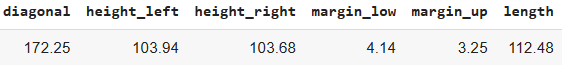
<!-- 1412 -->

In [127]:
deteksi = pd.read_csv('deteksi_uang_palsu.csv')

In [128]:
deteksi

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [129]:
uji = {
    "diagonal":172.25,
    "height_left":103.94,
    "height_right":103.68,
    "margin_low":4.14,
    "margin_up":3.25,
    "length":112.48
}

1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi
2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)
3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

##Mencari jarak

In [130]:
jarak = []#mencari jarak terdekat
jarak_2 = []#dibutuhkan untuk sort jarak terdekat (dibagian Menentukan hasil prediksi)

In [131]:
jarak.clear()
jarak_2.clear()
for i in range(len(deteksi)):
  hasil_jarak = ((deteksi["diagonal"][i] - uji["diagonal"])**2 + (deteksi["height_left"][i] - uji["height_left"])**2 + (deteksi["height_right"][i] - uji["height_right"])**2 + (deteksi["margin_low"][i] - uji["margin_low"])**2 + (deteksi["margin_up"][i] - uji["margin_up"])**2 + (deteksi["length"][i] - uji["length"])**2)**0.5
  jarak.append(hasil_jarak)
  jarak_2.append(hasil_jarak)

#https://ilmudatapy.com/algoritma-k-nearest-neighbor-knn-untuk-klasifikasi/

In [132]:
jarak

[0.6712674578735285,
 1.4583209523283898,
 0.8346256645946192,
 0.9109335870413307,
 1.3125928538583398,
 2.42128065287773,
 1.741895519254815,
 1.113463066293622,
 1.722033681435988,
 1.7382174777627788]

###Menentukan K

In [133]:
K = round(len(deteksi)**0.5) 
# 3.1622776601683795 dibulatkan menjadi 3 
# jadi ada sebanyak 3 label yang akan keluar

jarak_2.sort() #mencari jarak terdekat dengan data baru
jarak_K = jarak_2[K-1] #mencari jarak terdekat ke 3
# 0.9109335870413307

###Menambah kolom jarak ke dataset

In [134]:
deteksi['jarak'] = jarak
deteksi

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,0.671267
1,True,171.66,103.68,103.41,4.35,3.33,113.74,1.458321
2,True,172.23,104.00,103.35,4.43,2.95,113.12,0.834626
3,True,172.07,104.21,103.82,4.29,3.35,113.30,0.910934
4,True,171.79,104.57,104.04,4.26,3.15,113.46,1.312593
5,False,172.00,104.23,104.52,5.76,3.37,110.94,2.421281
6,False,171.56,104.03,103.93,5.47,3.50,111.67,1.741896
7,False,171.90,104.33,104.40,4.70,3.31,112.12,1.113463
8,False,171.84,104.06,104.10,4.87,3.25,111.04,1.722034
9,False,172.11,104.14,104.15,4.84,3.28,110.98,1.738217


##Menentukan hasil prediksi

###Menambahkan kolom k, untuk melihat jarak yang terpenuhi

In [135]:
hasil = []
for a in range(len(deteksi)):
  if deteksi["jarak"][a] <= jarak_K:# menentukan apakah jaraknya lebih dekat dengan data baru
    hasil.append(deteksi["is_genuine"][a])
  else :
    hasil.append("Jarak tidak terpenuhi")

deteksi["k"] = hasil #menambahkan kolom k, untuk melihat jarak yang terpenuhi
deteksi

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,jarak,k
0,True,172.06,104.24,103.66,4.24,3.10,113.02,0.671267,True
1,True,171.66,103.68,103.41,4.35,3.33,113.74,1.458321,Jarak tidak terpenuhi
2,True,172.23,104.00,103.35,4.43,2.95,113.12,0.834626,True
3,True,172.07,104.21,103.82,4.29,3.35,113.30,0.910934,True
4,True,171.79,104.57,104.04,4.26,3.15,113.46,1.312593,Jarak tidak terpenuhi
5,False,172.00,104.23,104.52,5.76,3.37,110.94,2.421281,Jarak tidak terpenuhi
6,False,171.56,104.03,103.93,5.47,3.50,111.67,1.741896,Jarak tidak terpenuhi
7,False,171.90,104.33,104.40,4.70,3.31,112.12,1.113463,Jarak tidak terpenuhi
8,False,171.84,104.06,104.10,4.87,3.25,111.04,1.722034,Jarak tidak terpenuhi
9,False,172.11,104.14,104.15,4.84,3.28,110.98,1.738217,Jarak tidak terpenuhi


###Menghitung jumlah kelas terbanyak dan hasil nya

In [136]:
genuine_True = 0 #jumlah dari hasil kelas
genuine_False = 0

for j in range(len(deteksi)):
  if deteksi["k"][j] == True:
    genuine_True += 1
  elif deteksi["k"][j] == False:
    genuine_False += 1
  else:
    continue

print(f"Jumlah kelas yang bernilai True = {genuine_True}")
print(f"Jumlah kelas yang bernilai False = {genuine_False}")

Jumlah kelas yang bernilai True = 3
Jumlah kelas yang bernilai False = 0


In [137]:
if genuine_True > genuine_False:
  print("Diketahui bahwa data baru / uang baru tersebut Asli")
else:
  print("Diketahui bahwa data baru / uang baru tersebut Palsu")

Diketahui bahwa data baru / uang baru tersebut Asli


# (3) Analisis

> Nama : Ahmad Lutfi

> Nim : 2109116009


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

##Business Understanding

Berdasarkan [ourworldindata](https://ourworldindata.org/grapher/annual-number-of-deaths-by-cause) penyebab kematian tertinggi didunia adalah Cardiovascular diseases (CVDs) sebanyak 18,56 juta. CVDs merupakan suatu keadaan dimana terjadinya gangguan pada sistem jantung dan pembuluh darah. CVDs inilah yang membuat seseorang dapat mengalami gagal jantung.



> **Target Bisnis :** Orang dengan penyakit kardiovaskular memerlukan deteksi dan pengobatan dini, yang bisa sangat bermanfaat. 




> **Target Data Mining :** Dengan dataset ini dapat membantu untuk memprediksi apakah seorang pasien rentan terhadap gagal jantung bergantung pada banyak atribut / faktor seperti umur, tekanan darah, kelamin, dll. 


[Pengertian CVDs](https://pjnhk.go.id/artikel/faktor-faktor-yang-mempengaruhi-self-care-management-pada-pasien-cardiovascular-disease)

##Data Understanding

###Collect Data

In [138]:
heart = pd.read_csv('heart.csv')

###Describe Data

**Informasi Atribut**


---


**Age**: age of the patient [years]

**Sex**: sex of the patient [M: Male, F: Female]

**ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

**RestingBP**: resting blood pressure [mm Hg]

**Cholesterol**: serum cholesterol [mm/dl]

**FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

**RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

**MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]

**ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]

**Oldpeak**: oldpeak = ST [Numeric value measured in depression]

**ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

**HeartDisease**: output class [1: heart disease, 0: Normal]

In [139]:
heart.head()

# Menampilkan 5 row pertama dari dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [140]:
heart.tail()

# Menampilkan 5 row terakhir dari dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [141]:
heart.shape


# Memberitahu bahwa dataset ini memiliki 918 row / baris dan terdapat 12 kolom

(918, 12)

In [142]:
heart.info()

# Menampilkan tipe data dari atribut2 yang ada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


###Data Visualization

####Comparison

<Axes: xlabel='HeartDisease', ylabel='count'>

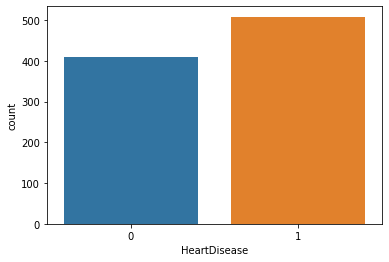

In [143]:
sns.countplot(data = heart,x="HeartDisease")

In [144]:
heart.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64



---



<Axes: xlabel='Sex', ylabel='count'>

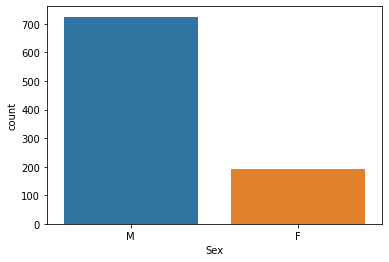

In [145]:
sns.countplot(data = heart,x="Sex")

In [146]:
heart.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64



---



<Axes: xlabel='ChestPainType', ylabel='count'>

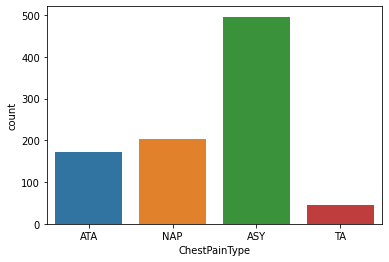

In [147]:
sns.countplot(data = heart,x="ChestPainType")



---


<Axes: xlabel='RestingECG', ylabel='count'>

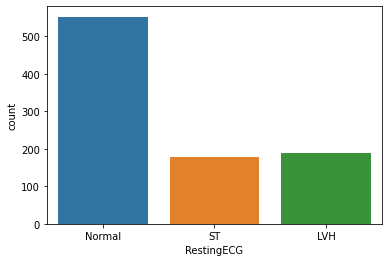

In [148]:
sns.countplot(data = heart,x="RestingECG")



---



<Axes: xlabel='ExerciseAngina', ylabel='count'>

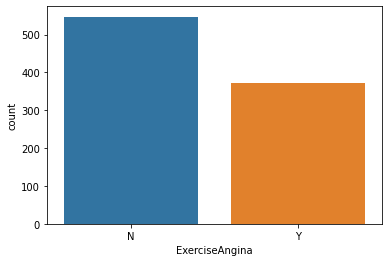

In [149]:
sns.countplot(data = heart,x="ExerciseAngina")



---



<Axes: xlabel='ST_Slope', ylabel='count'>

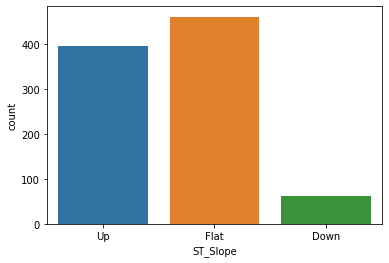

In [150]:
sns.countplot(data = heart,x="ST_Slope")



---



Menampilkan berapa banyak gender HeartDisease (yang terkena penyakit jantung)

<Axes: xlabel='count', ylabel='Sex'>

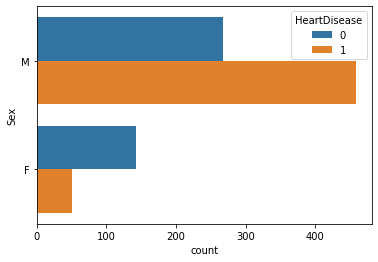

In [152]:
sns.countplot(data = heart,y="Sex", hue="HeartDisease")



---



####Distribution

<Axes: xlabel='Age', ylabel='Count'>

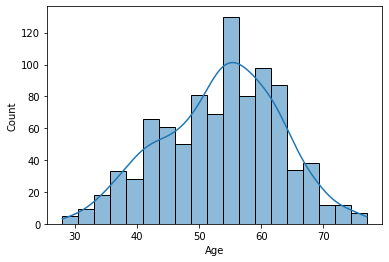

In [153]:
sns.histplot(data = heart, x = "Age",kde = True)



---



<Axes: xlabel='RestingBP', ylabel='Density'>

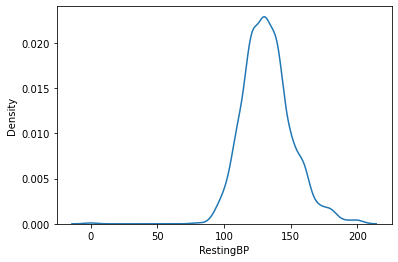

In [154]:
sns.kdeplot(data = heart, x = "RestingBP")



---



<Axes: xlabel='Cholesterol', ylabel='Density'>

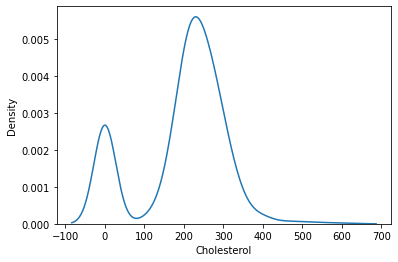

In [155]:
sns.kdeplot(data = heart, x = "Cholesterol")



---



<Axes: xlabel='MaxHR', ylabel='Density'>

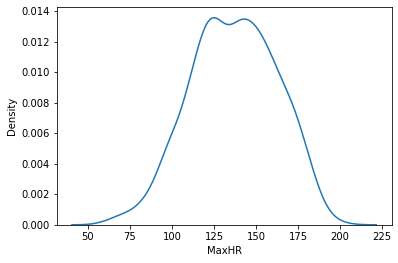

In [156]:
sns.kdeplot(data = heart, x = "MaxHR")



---



Menampilkan umur pasien yang terkena penyakit jantung banyak berada di umur 50 - 60an

<Axes: xlabel='HeartDisease', ylabel='Age'>

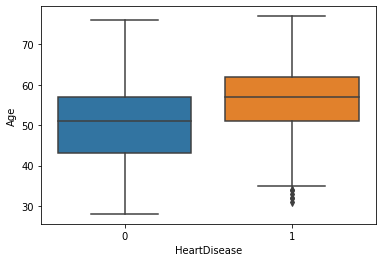

In [157]:
sns.boxplot(data = heart, x = "HeartDisease", y="Age")

####Relationship

<Axes: xlabel='Age', ylabel='Cholesterol'>

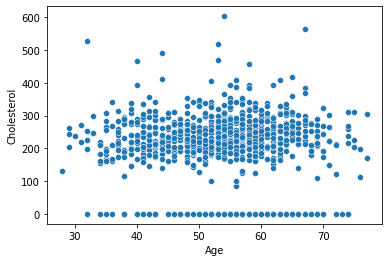

In [158]:
sns.scatterplot(data = heart, x="Age", y="Cholesterol")

<Axes: xlabel='Age', ylabel='RestingBP'>

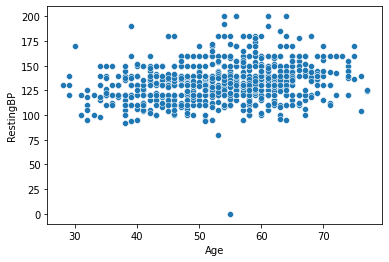

In [159]:
sns.scatterplot(data = heart, x="Age", y="RestingBP")

<Axes: xlabel='Age', ylabel='MaxHR'>

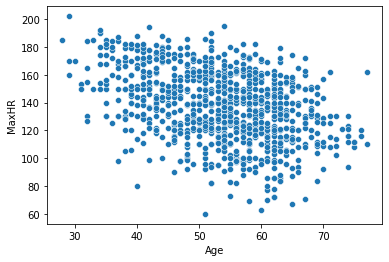

In [160]:
sns.scatterplot(data = heart, x="Age", y="MaxHR")

###Composisiton

In [161]:
sex_comp = heart[heart['HeartDisease'] == 1]['Sex'].value_counts().reset_index()
#https://plotly.com/python/pie-charts/

In [162]:
sex_comp

,index,Sex
0,M,458
1,F,50




> Menampilkan jumlah gender (laki2 / perempuan) yang banyak terkana penyakit jantung



In [163]:
px.pie(names=sex_comp.index,values=sex_comp.Sex )



---



In [164]:
HeartDisease_comp = heart.HeartDisease.value_counts().reset_index()

In [165]:
px.pie(names=HeartDisease_comp.index,values=HeartDisease_comp.HeartDisease )

##Data Preparation

###Cleaning Data



> Tidak terdapat kolom yang harus di *drop* karena semua mempunyai informasi penting tersendiri. Kecuali jika ada kolom nama, maka kolom tersebut harus didrop.

In [166]:
duplicateRows = heart[heart.duplicated()]
duplicateRows

# Mengecek apakah ada duplikat

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [167]:
heart.isna().sum()

# Mengecek apakah ada missing value

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

###Preprocessing

In [168]:
heart_2 = pd.get_dummies(heart)

# Encoding / mengubah semua tipe Categorical ke numerik

In [169]:
heart_2.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
5,39,120,339,0,170,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
6,45,130,237,0,170,0.0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
7,54,110,208,0,142,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
8,37,140,207,0,130,1.5,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
9,48,120,284,0,120,0.0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
